# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.9768,  0.5397,  0.9241,  0.621 ,  0.6428,  0.5169,  0.9249,  0.9137,  0.5157,  0.5472,
        0.4596,  0.8797,  0.2443,  0.8795,  0.0408,  0.8448,  0.9912,  0.1924,  0.7871,  0.0699,
        0.793 ,  0.0876,  0.2108,  0.0318,  0.2491,  0.3884,  0.0463,  0.0969,  0.4524,  0.6549])

In [6]:
y

array([ 10.9304,   9.6192,  10.7723,   9.863 ,   9.9283,   9.5506,  10.7748,  10.741 ,   9.5472,
         9.6415,   9.3789,  10.6391,   8.733 ,  10.6386,   8.1225,  10.5344,  10.9735,   8.5772,
        10.3614,   8.2097,  10.3789,   8.2629,   8.6323,   8.0953,   8.7474,   9.1653,   8.139 ,
         8.2908,   9.3571,   9.9647])

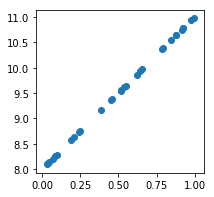

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1607

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani